# Exploring Lending Club Data

Source: https://www.lendingclub.com/info/download-data.action

Loan Attributes:  (using loans_all.columns.values.tolist())
1. id
2. member_id
3. loan_amnt
4. funded_amnt
5. funded_amnt_inv
6. term
7. int_rate
8. installment
9. grade
10. sub_grade
11. emp_title
12. emp_length
13. home_ownership
14. annual_inc
15. is_inc_v
16. issue_d
17. loan_status
18. pymnt_plan
19. url
20. desc
21. purpose
22. title
23. zip_code
24. addr_state
25. dti
26. delinq_2yrs
27. earliest_cr_line
28. inq_last_6mths
29. mths_since_last_delinq
30. mths_since_last_record
31. open_acc
32. pub_rec
33. revol_bal
34. revol_util
35. total_acc
36. initial_list_status
37. out_prncp
38. out_prncp_inv
39. total_pymnt
40. total_pymnt_inv
41. total_rec_prncp
42. total_rec_int
43. total_rec_late_fee
44. recoveries
45. collection_recovery_fee
46. last_pymnt_d
47. last_pymnt_amnt
48. next_pymnt_d
49. last_credit_pull_d
50. loans_all
51. mths_since_last_major_derog
52. policy_code

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.tools.merge import concat

path_loans_a = "Data/LoanStatsSpA.csv"
path_loans_b = "Data/LoanStatsSpB.csv"
path_loans_c = "Data/LoanStatsSpC.csv"
path_rejects_a = "Data/RejectStatsSpA.csv"
path_rejects_b = "Data/RejectStatsSpB.csv"
path_rejects_c = "Data/RejectStatsSpC.csv"

loans_all = concat([
        pd.read_csv(path_loans_a, header=1),  # skipfooter=4
        pd.read_csv(path_loans_b, header=1),
        pd.read_csv(path_loans_c, header=1)
    ])
print "Loan dataset shape: ",loans_all.shape

rejects_all = concat([
        pd.read_csv(path_rejects_a, header=1),  # skipfooter=4
        pd.read_csv(path_rejects_b, header=1),
        pd.read_csv(path_rejects_c, header=1)
    ])
print "Rejection dataset shape: ",rejects_all.shape

Loan dataset shape:  (466288, 52)
Rejection dataset shape:  (3444216, 9)


In [17]:
loans_all.head(n=3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
0,1077501,1296599,5000,5000,4975,36 months,10.65%,162.87,B,B2,...,0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2015,0,NaN,1
1,1077430,1314167,2500,2500,2500,60 months,15.27%,59.83,C,C4,...,0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0,NaN,1
2,1077175,1313524,2400,2400,2400,36 months,15.96%,84.33,C,C5,...,0,0.00,0.00,Jun-2014,649.91,NaN,Mar-2015,0,NaN,1


In [24]:
rejects_all.head(n=3)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000,2007-05-26,Wedding Covered but No Honeymoon,693,10%,481xx,NM,4 years,0
1,1000,2007-05-26,Consolidating Debt,703,10%,010xx,MA,< 1 year,0
2,11000,2007-05-27,Want to consolidate my debt,715,10%,212xx,MD,1 year,0


In [16]:
loans_all.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code
count,466287.000000,466287.000000,466287.000000,466287.000000,466287.000000,466283.000000,466287.000000,466258.000000,466258.000000,215936.000000,...,466287.000000,466287.000000,466287.000000,466287.000000,466287.000000,466287.000000,466287.000000,466142.000000,98975.000000,466287
mean,14597692.913152,14317.280505,14291.804082,14222.333224,432.071828,73277.425318,17.218747,0.284686,0.804743,34.104225,...,7670.571367,5831.513869,1876.995811,0.371390,30.521571,1.393971,2082.207402,0.009085,42.852296,1
std,11682382.991396,8286.497984,8274.360164,8297.626611,243.486831,54963.539224,7.851106,0.797374,1.091596,21.778490,...,7178.260008,6162.943402,1979.650957,3.786167,318.387332,49.241851,4612.295081,0.108648,21.662626,0
min,70473.000000,500.000000,500.000000,0.000000,15.670000,1896.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
25%,4379706.000000,8000.000000,8000.000000,8000.000000,256.715000,45000.000000,11.360000,0.000000,0.000000,16.000000,...,2592.005000,1629.280000,629.860000,0.000000,0.000000,0.000000,287.440000,0.000000,26.000000,1
50%,11941075.000000,12000.000000,12000.000000,12000.000000,379.910000,63000.000000,16.870000,0.000000,0.000000,31.000000,...,5338.720000,3584.880000,1247.770000,0.000000,0.000000,0.000000,467.030000,0.000000,42.000000,1
75%,23001543.000000,20000.000000,20000.000000,19950.000000,566.625000,88960.500000,22.780000,0.000000,1.000000,49.000000,...,10461.095000,7850.000000,2356.685000,0.000000,0.000000,0.000000,826.050000,0.000000,59.000000,1
max,40860827.000000,35000.000000,35000.000000,35000.000000,1409.990000,7500000.000000,39.990000,29.000000,33.000000,188.000000,...,54820.360000,35000.030000,21144.990000,239.120000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1


## Review Attributes

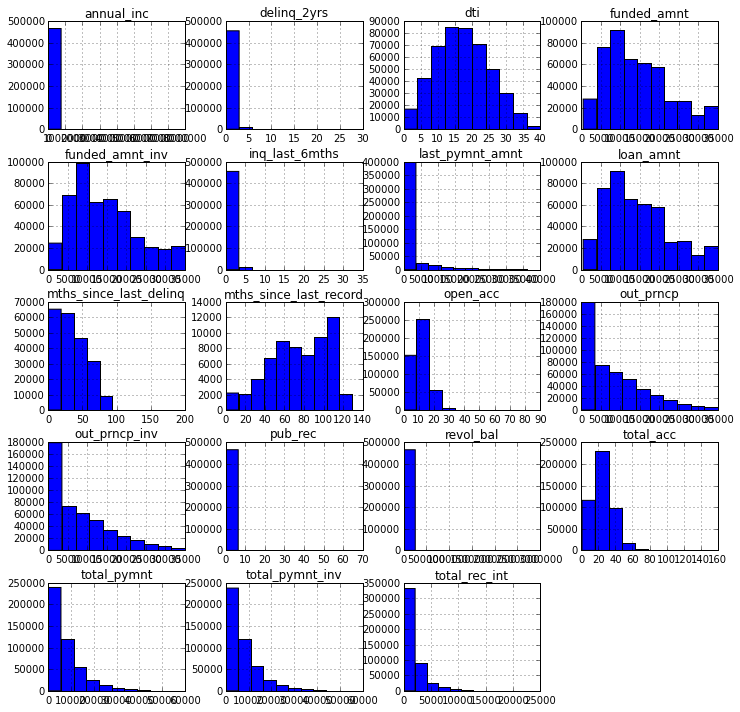

In [34]:
# Create reduced dataset, limited to attributes meaningful to analysis
loans = loans_all.drop(["member_id", "url", "desc", "installment", "total_rec_prncp", "emp_title", "emp_length", "next_pymnt_d", "collections_12_mths_ex_med", "mths_since_last_major_derog", "policy_code", "last_pymnt_d", "last_credit_pull_d", "total_rec_late_fee", "recoveries", "collection_recovery_fee"], axis=1)

# Save to file - required exercise
loans.to_csv("Data/Loans_Reduced.csv", sep='\t') 

# Attribute histograms
loans.hist(figsize=(12, 12));

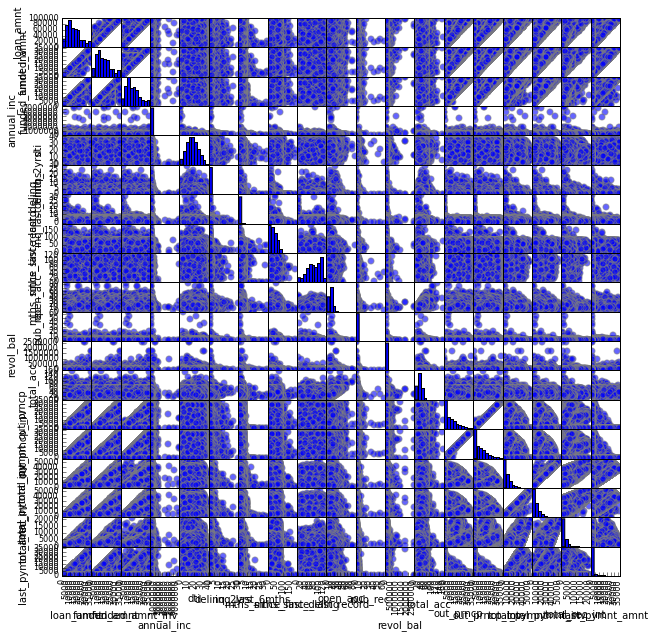

In [26]:
pd.scatter_matrix(loans, figsize=(10, 10), s=150, alpha=0.6, cmap='brg', edgecolors='gray');

## Preliminary questions to assess

1. Will this loan go into default?
2. Will a loan application be accepted?
3. How can a lender optimize terms of a loan in order to avoid default?

## Challenge 1: Identifying whether the loan will be paid on time

In [31]:
# Assess loan status attribute

loan_status = loans["loan_status"]
print loan_status.value_counts()

Current                                                        324203
Fully Paid                                                     105350
Charged Off                                                     23881
Late (31-120 days)                                               5881
In Grace Period                                                  2805
Does not meet the credit policy.  Status:Fully Paid              1915
Late (16-30 days)                                                1269
Does not meet the credit policy.  Status:Charged Off              756
Default                                                           149
Does not meet the credit policy.  Status:Current                   72
Does not meet the credit policy.  Status:Late (31-120 days)         6
dtype: int64


In [33]:
# Create GS attribute for defaulting

default = loan_status.map({'Default':1})
default = default.fillna(0)  # Replace NaN's with 0

print data_red.shape
default.value_counts()

(466288, 36)


0    466139
1       149
dtype: int64